<a href="https://colab.research.google.com/github/NsiriRoua/Regression/blob/main/Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression from Scratch**

**Import Resources**

In [ ]:
import numpy as np
np.set_printoptions(precision=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


# **Binary Logistic Regression**

In [ ]:
#Import data
breast_cancer_data=datasets.load_breast_cancer()
X=breast_cancer_data['data']
y=breast_cancer_data['target']

**Logistic Regression function**

In [ ]:
# This function will return a vector of probabilities
def LogisticRegression(z):
  return 1/1+np.exp(-z)


**StandardScaler function**

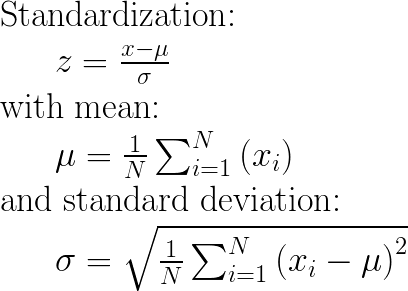

In [ ]:
def StandardScaler(z):
  mean=z.mean(0)
  sd=z.std(0)
  return (z-mean)/sd

**Binary Logistic Regression class**

In [ ]:
class BinaryLogisticRegression:
    
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        
        ### ###
        if standardize:
            X =StandardScaler(X) 
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr

        ### Calculate Beta ###
        beta = np.random.randn(self.D) 
        for i in range(n_iter):
            p =LogisticRegression(np.dot(self.X, beta)) # vector of probabilities 
            gradient = -np.dot(self.X.T, (self.y-p)) # gradient
            beta -= self.lr*gradient 
            
        ### Update Values ###
        self.beta = beta
        self.p =LogisticRegression(np.dot(self.X, self.beta)) 
        self.yhat = self.p.round()






In [ ]:
binary_lr=BinaryLogisticRegression()
binary_lr.fit(X,y,n_iter=100000,lr=0.0000001)
print('In-sample accuracy: '  + str(np.mean(binary_lr.yhat == binary_lr.y)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In-sample accuracy: 0.0


# **Multiclass LogisticRegression**

In [ ]:
#Let's import data
wine_dataset=datasets.load_wine()
X_wine=wine_dataset['data']
y_wine=wine_dataset['target']

In [ ]:
#Softmax function
def Softmax(z):
  return np.exp(z)/(np.exp(z).sum()) 

In [ ]:
#Softmax by row
def Softmax_by_row(z):
  return (np.exp(z)/np.exp(z).sum(1)[:,None])

def make_I_matrix(y):
    I = np.zeros(shape = (len(y), len(np.unique(y))), dtype = int)
    for j, target in enumerate(np.unique(y)):
        I[:,j] = (y == target)
    return I

#Let's test 
Z_test=np.array([[1,1],[0,1]])
print('Softmax for Z:\n', Softmax_by_row(Z_test).round(2))

y_test = np.array([0,0,1,1,2])
print('I matrix of [0,0,1,1,2]:\n', make_I_matrix(y_test), end = '\n\n')


Softmax for Z:
 [[0.5 0.5]
 [0.3 0.7]]
I matrix of [0,0,1,1,2]:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]



In [ ]:
class MultiLogisticRegression:
      
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        
        ### Record Info ###
        if standardize:
            X = StandardScaler(X) 
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.K = len(np.unique(y))
        self.n_iter = n_iter
        self.lr = lr
        
        ### Fit B ###
        B = np.random.randn(self.D*self.K).reshape((self.D, self.K))
        self.I = make_I_matrix(self.y)
        for i in range(n_iter):
            Z = np.dot(self.X, B)
            P = Softmax_by_row(Z)
            gradient = np.dot(self.X.T, self.I - P)
            B += lr*gradient
        
        ### Return Values ###
        self.B = B
        self.Z = np.dot(self.X, B)
        self.P = Softmax_by_row(self.Z)
        self.yhat = self.P.argmax(1) 
      #yhat value return the class with the high estimated probability



In [ ]:
#Instanciate our model
model=MultiLogisticRegression()
# Fit our model
model.fit(X_wine, y_wine, 10**4, 0.0001)
# Evalute :Accuarcy
print('In-sample accuracy: '  + str(np.mean(model.yhat == y_wine)))

In-sample accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


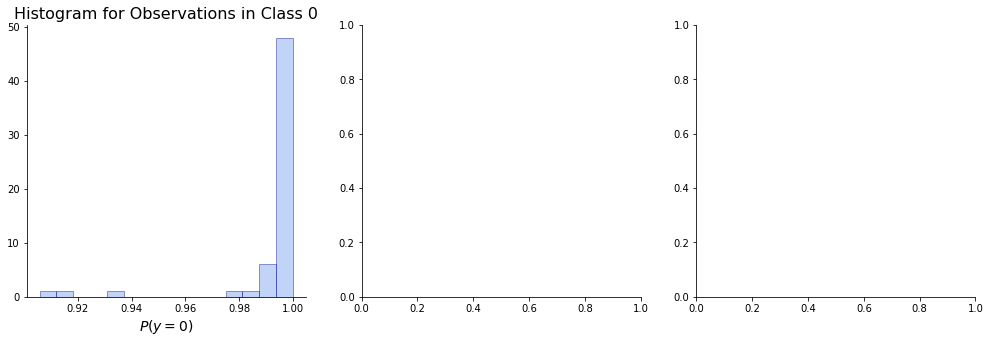

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (17, 5))
for i, y in enumerate(np.unique(y)):
    sns.distplot(model.P[model.y == y, i],
                 hist_kws=dict(edgecolor="darkblue"), 
                 color = 'cornflowerblue',
                 bins = 15, 
                 kde = False,
                 ax = ax[i]);
    ax[i].set_xlabel(xlabel = fr'$P(y = {y})$', size = 14)
    ax[i].set_title('Histogram for Observations in Class '+ str(y), size = 16)
sns.despine()

# **The perceptron Algorithm**

**import data**

In [ ]:
cancer=datasets.load_breast_cancer()
x_cancer=cancer['data']
y_cancer=cancer['target']

In [ ]:
def sign(a):
    return (-1)**(a < 0)

def to_binary(y):
        return y > 0 

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd

In [ ]:
class Perceptron:

    def fit(self, X, y, n_iter = 10**3, lr = 0.001, add_intercept = True, standardize = True):
        
        # Add Info #
        if standardize:
            X = standard_scaler(X)
        if add_intercept:
            ones = np.ones(len(X)).reshape(-1, 1)
        self.X = X
        self.N, self.D = self.X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr
        self.converged = False
        
        # Fit #
        beta = np.random.randn(self.D)/5
        for i in range(int(self.n_iter)):
            
            # Form predictions
            yhat = to_binary(sign(np.dot(self.X, beta)))
            
            # Check for convergence
            if np.all(yhat == sign(self.y)):
                self.converged = True
                self.iterations_until_convergence = i
                break
                
            # Otherwise, adjust
            for n in range(self.N):
                yhat_n = sign(np.dot(beta, self.X[n]))
                if (self.y[n]*yhat_n == -1):
                    beta += self.lr * self.y[n]*self.X[n]

        # Return Values #
        self.beta = beta
        self.yhat = to_binary(sign(np.dot(self.X, self.beta)))


In [ ]:
perceptron = Perceptron()
perceptron.fit(x_cancer, y_cancer, n_iter = 1e3, lr = 0.01)
np.mean(perceptron.yhat == perceptron.y)

0.9771528998242531